http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_arma.html

In [27]:
import numpy as np
from scipy import stats
import pandas
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

%matplotlib inline

In [28]:
print (sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [29]:
dta = sm.datasets.sunspots.load_pandas().data

In [30]:
dta.index = pandas.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

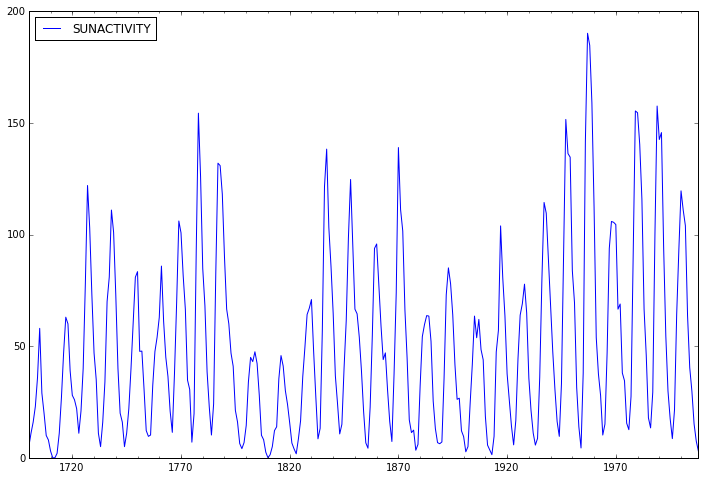

In [13]:
dta.plot(figsize=(12,8))

C:\Users\a\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


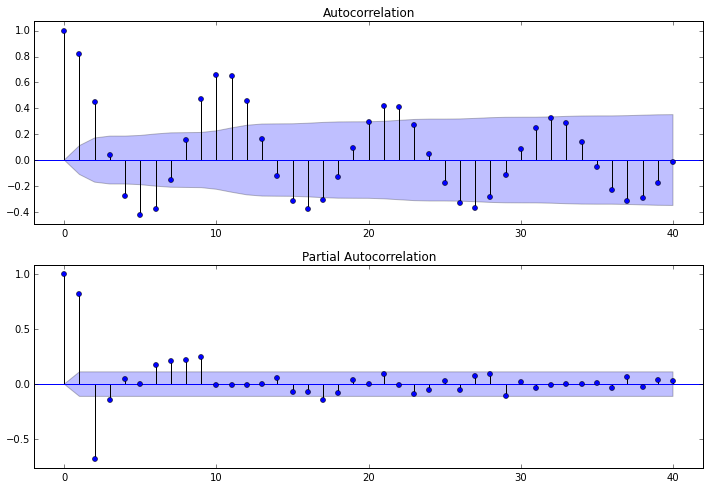

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [17]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
print (arma_mod20.params)

const                49.659343
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [18]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()

In [20]:
print (arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.6363380639814 2637.56970317 2628.60672591
